In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data

https://github.com/ishaghodgaonkar/emrbots/blob/master/100-Patients.zip

unzip it into the Data folder

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt
import matplotlib 

In [2]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)

admiss_core = pd.read_csv("C:\\Users\\owner\\Documents\\BIOS 6644 Spring 2024\\BIOS6644_Spring_2024\\Modules\\Module_1\\data\\AdmissionsCorePopulatedTable.txt",sep="\t",index_col="PatientID")
admiss_diag_core = pd.read_csv("C:\\Users\\owner\\Documents\\BIOS 6644 Spring 2024\\BIOS6644_Spring_2024\\Modules\\Module_1\\data\AdmissionsDiagnosesCorePopulatedTable.txt",sep="\t",index_col="PatientID")
patient_core = pd.read_csv("C:\\Users\\owner\\Documents\\BIOS 6644 Spring 2024\\BIOS6644_Spring_2024\\Modules\\Module_1\\data\\PatientCorePopulatedTable.txt",sep="\t",index_col="PatientID")
labs_core = pd.read_csv("C:\\Users\\owner\\Documents\\BIOS 6644 Spring 2024\\BIOS6644_Spring_2024\\Modules\\Module_1\\data\\LabsCorePopulatedTable.txt",sep="\t",index_col="PatientID")

In [3]:
# 1) 
admiss_core, 
patient_core
labs_core

,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677
...,...,...,...,...,...
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: HEMOGLOBIN,13.6,gm/dl,2012-04-21 03:23:50.883
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: MCH,26.2,pg,2012-04-21 03:18:44.127
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,METABOLIC: CHLORIDE,104.4,mmol/L,2012-04-21 02:58:57.840


In [4]:
# Dates!

In [5]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type
def convert_cols_to_datetime(df):
    for col in df:
        if "date" in col.lower() and type(df[col]) is not np.dtype('datetime64[ns]'):
            df[col] = pd.to_datetime(df[col])
  

In [6]:

# 1) 
convert_cols_to_datetime(admiss_core)
convert_cols_to_datetime(admiss_diag_core)
convert_cols_to_datetime(patient_core)
convert_cols_to_datetime(labs_core)


In [7]:
admiss_core.iloc[3]['AdmissionEndDate']-admiss_core.iloc[3]['AdmissionStartDate']


Timedelta('5 days 10:14:56.766000')

In [8]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# 7A025E77-7832-4F53-B9A7-09A3F98AC17E	
pid='7A025E77-7832-4F53-B9A7-09A3F98AC17E'
admiss_core.loc[admiss_core.index==pid]
#admiss_core


,AdmissionID,AdmissionStartDate,AdmissionEndDate
PatientID,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,2011-10-12 14:55:02.027,2011-10-22 01:16:07.557
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,1978-06-29 07:29:11.593,1978-07-10 04:05:51.787
7A025E77-7832-4F53-B9A7-09A3F98AC17E,2,1982-10-14 07:01:43.613,1982-10-21 16:44:00.310
7A025E77-7832-4F53-B9A7-09A3F98AC17E,3,1990-02-23 04:28:34.457,1990-03-13 15:55:29.837
7A025E77-7832-4F53-B9A7-09A3F98AC17E,4,1994-05-15 11:34:00.840,1994-05-19 23:04:04.877
7A025E77-7832-4F53-B9A7-09A3F98AC17E,5,2001-01-10 11:04:58.943,2001-01-27 00:54:18.730
7A025E77-7832-4F53-B9A7-09A3F98AC17E,6,2001-12-29 20:28:01.050,2002-01-18 18:16:04.423


In [9]:
labs_core.loc[labs_core.index==pid]



,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CARBON DIOXIDE,20.9,mmol/L,1978-06-29 22:56:25.430
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: BILI TOTAL,0.3,mg/dL,1978-06-30 00:55:28.273
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CALCIUM,7.4,mg/dL,1978-06-30 07:11:48.760
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: NEUTROPHILS,2.8,k/cumm,1978-06-30 00:01:24.477
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: MCHC,32.2,g/dl,1978-06-30 04:33:20.790
...,...,...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,METABOLIC: ALT/SGPT,65.9,U/L,2011-10-21 22:37:12.087
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: HEMOGLOBIN,11.6,gm/dl,2011-10-22 00:25:12.860
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: RDW,14.7,%,2011-10-21 21:29:42.703


In [10]:
# SQL-like joins
jdf =  patient_core.join(labs_core, how='left')


In [11]:
jdf.shape, patient_core.shape, labs_core.shape

((111483, 11), (100, 6), (111483, 5))

In [12]:
# Holy cow!  this patient has lots of lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()

#This is mainly doing as an overall dataset.
print("Stats on Number of Labs per Patient")
print(jdf.groupby('PatientID').size().describe())



#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#    

print("Number of each lab")
jdf.groupby('LabName').size()
#https://stackoverflow.com/questions/33575587/pandas-dataframe-how-to-apply-describe-to-each-group-and-add-to-new-columns


Stats on Number of Labs per Patient
count     100.00000
mean     1114.83000
std       539.36152
min        86.00000
25%       706.25000
50%      1032.50000
75%      1441.25000
max      2760.00000
dtype: float64
Number of each lab


LabName
CBC: ABSOLUTE LYMPHOCYTES        3162
CBC: ABSOLUTE NEUTROPHILS        3210
CBC: BASOPHILS                   3165
CBC: EOSINOPHILS                 3191
CBC: HEMATOCRIT                  3211
CBC: HEMOGLOBIN                  3193
CBC: LYMPHOCYTES                 3162
CBC: MCH                         3191
CBC: MCHC                        3202
CBC: MEAN CORPUSCULAR VOLUME     3175
CBC: MONOCYTES                   3129
CBC: NEUTROPHILS                 3224
CBC: PLATELET COUNT              3177
CBC: RDW                         3188
CBC: RED BLOOD CELL COUNT        3174
CBC: WHITE BLOOD CELL COUNT      3209
METABOLIC: ALBUMIN               3202
METABOLIC: ALK PHOS              3154
METABOLIC: ALT/SGPT              3155
METABOLIC: ANION GAP             3166
METABOLIC: AST/SGOT              3179
METABOLIC: BILI TOTAL            3182
METABOLIC: BUN                   3158
METABOLIC: CALCIUM               3179
METABOLIC: CARBON DIOXIDE        3218
METABOLIC: CHLORIDE              3190
META

In [28]:
#THIS CODE HELPS ANSWER THE QUESTION:Compute the average & standard deviation of number of labs per patient as well.
dat=jdf['LabValue'].groupby('PatientID').describe()


In [29]:
#find mean and std
dat['count'].mean(), dat['count'].std()

(1114.83, 539.3615203144915)

In [15]:
#Compute a list of each lab and how many orders for that lab are in the data frame
jdf['LabName'].value_counts()

LabName
CBC: NEUTROPHILS                 3224
URINALYSIS: WHITE BLOOD CELLS    3218
METABOLIC: CARBON DIOXIDE        3218
CBC: HEMATOCRIT                  3211
CBC: ABSOLUTE NEUTROPHILS        3210
CBC: WHITE BLOOD CELL COUNT      3209
METABOLIC: SODIUM                3207
CBC: MCHC                        3202
METABOLIC: GLUCOSE               3202
METABOLIC: ALBUMIN               3202
CBC: HEMOGLOBIN                  3193
METABOLIC: CREATININE            3193
CBC: MCH                         3191
CBC: EOSINOPHILS                 3191
METABOLIC: CHLORIDE              3190
CBC: RDW                         3188
URINALYSIS: RED BLOOD CELLS      3187
URINALYSIS: PH                   3187
METABOLIC: POTASSIUM             3185
METABOLIC: BILI TOTAL            3182
URINALYSIS: SPECIFIC GRAVITY     3181
METABOLIC: CALCIUM               3179
METABOLIC: AST/SGOT              3179
CBC: PLATELET COUNT              3177
METABOLIC: TOTAL PROTEIN         3177
CBC: MEAN CORPUSCULAR VOLUME     3175
CBC:

In [30]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken

s = (jdf.groupby('PatientID').size().sort_values())
print(s)

#index[-1] is selecting from bottom and going up.
pt_most_labs=jdf.groupby('PatientID').size().sort_values().index[-1]
print(f"Patient with the most labs: {pt_most_labs}")


#   2) For the most-measured patient/lab combination, make a time vs lab-value plot
#    Hint:  you can "group by" multiple columns

PatientID
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D      86
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B     130
8856096E-E59C-4156-A767-C091AF799C80     230
C2CCB1AB-6633-4CB3-B4E8-157E6FB02376     360
672D554B-D6D1-40B2-A6A4-21A4CB6B1AA6     399
                                        ... 
7A025E77-7832-4F53-B9A7-09A3F98AC17E    2259
A0A976C8-9B30-4492-B8C4-5B25095B9192    2263
36775002-9EC3-4889-AD4F-80DC6855C8D8    2372
25B786AF-0F99-478C-9CFA-0EA607E45834    2561
80D356B4-F974-441F-A5F2-F95986D119A2    2760
Length: 100, dtype: int64
Patient with the most labs: 80D356B4-F974-441F-A5F2-F95986D119A2


In [31]:
# 1) Grouping by using the PatientID and LabName is what allows us to get the combination we are looking for and sort
#help get from lowest to highest number.
jdf.groupby(['PatientID','LabName']).size().sort_values()


PatientID                             LabName                     
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B  CBC: LYMPHOCYTES                 1
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D  URINALYSIS: SPECIFIC GRAVITY     1
                                      CBC: HEMATOCRIT                  1
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B  METABOLIC: SODIUM                1
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D  CBC: EOSINOPHILS                 2
                                                                      ..
80D356B4-F974-441F-A5F2-F95986D119A2  CBC: HEMOGLOBIN                 83
                                      METABOLIC: ALT/SGPT             84
                                      METABOLIC: POTASSIUM            84
                                      CBC: PLATELET COUNT             84
                                      CBC: HEMATOCRIT                 88
Length: 3499, dtype: int64

In [32]:
#create a dataset that has info on the patient we are interested on
#Display value that corresponds to a specific date in jupyter
subdf = jdf.loc[(jdf.index=='80D356B4-F974-441F-A5F2-F95986D119A2') & (jdf.LabName.str.startswith('CBC: HEMATOCRIT'))]
subdf


,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,,,,,,,
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,1,CBC: HEMATOCRIT,39.3,%,1965-01-31 04:20:01.450
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,1,CBC: HEMATOCRIT,38.9,%,1965-02-01 04:24:54.520
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,1,CBC: HEMATOCRIT,53.4,%,1965-02-01 12:06:34.270
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,1,CBC: HEMATOCRIT,32.9,%,1965-02-03 07:18:53.007
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,1,CBC: HEMATOCRIT,49.1,%,1965-02-03 23:01:51.497
...,...,...,...,...,...,...,...,...,...,...,...
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,7,CBC: HEMATOCRIT,43.3,%,2012-11-02 08:12:45.127
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,7,CBC: HEMATOCRIT,50.2,%,2012-11-04 22:07:36.617
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,7,CBC: HEMATOCRIT,42.8,%,2012-11-06 14:33:02.890


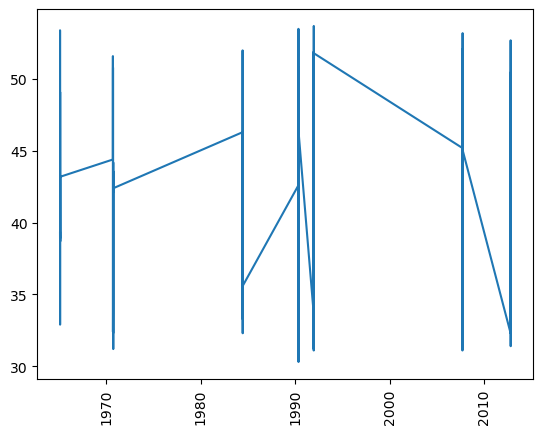

In [32]:
# 2) Make plot
from matplotlib import pyplot as plt 


dts = subdf.LabDateTime
vls = subdf.LabValue

plt.figure()
plt.plot(dts, vls)
plt.xticks(rotation=90)
# function to show the plot 
plt.show()

In [ ]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?
#
# 2) How about the value for December 14, 1991?

In [23]:
#find values which correspond to the dates in question
print(subdf[subdf["LabDateTime"] == '1985-08-06']['LabValue'])
print(subdf[subdf["LabDateTime"] == '1991-12-14']['LabValue'])
                  

Series([], Name: LabValue, dtype: float64)
Series([], Name: LabValue, dtype: float64)


There is no information on lab value that corresponds to the dates asked.